## TEAM 21 PROJECT

### Linear Regression

Here, we will model **XYZ** based on demographic, economical and campaign performance characteristics.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1]:
import seaborn as sns
import pandas as pd

# Load CSV dataset
csv_data = pd.read_csv('bank-full_worked.csv')

# Display the DataFrame
print(csv_data.head())

   age      job marital  education default  balance housing loan    contact  \
0   18  student  single    primary      no     1944      no   no  telephone   
1   18  student  single    unknown      no      108      no   no   cellular   
2   18  student  single    primary      no      608      no   no   cellular   
3   18  student  single    unknown      no       35      no   no  telephone   
4   18  student  single  secondary      no        5      no   no   cellular   

   day month  duration  campaign  pdays  previous poutcome    y  
0   10   aug       122         3     -1         0  unknown   no  
1   10   aug       167         1     -1         0  unknown  yes  
2   12   aug       267         1     -1         0  unknown  yes  
3   21   aug       104         2     -1         0  unknown   no  
4   24   aug       143         2     -1         0  unknown   no  


#### **Data inspection**

Before fitting any model, it is essential to understand our data.

_(i)_ How many observations (rows) does the dataset contain and also how many variables (columns) does the dataset contain?

In [3]:
num_rows, num_columns = csv_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 45211
Number of columns: 17


In [10]:
# Print the column names
print(csv_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


Contacts with the greatest balance

In [22]:
top_100_balance = csv_data.nlargest(100, 'balance')
print("Top 100 contacts with the greatest 'balance':")
print(top_100_balance)

Top 100 contacts with the greatest 'balance':
       age           job   marital  education default  balance housing loan  \
36538   51    management    single   tertiary      no   102127      no   no   
42980   59    management   married   tertiary      no    98417      no   no   
45173   84       retired   married  secondary      no    81204      no   no   
45175   84       retired   married  secondary      no    81204      no   no   
43891   60       retired   married    primary      no    71188      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
40656   56    management   married   tertiary      no    25290      no   no   
31259   46  entrepreneur   married   tertiary      no    25204     yes  yes   
7808    31    management    single   tertiary      no    24870     yes   no   
26651   42    management   married   tertiary      no    24780      no   no   
30120   45    management  divorced   tertiary      no    24598     yes   no   

     

Number of predirtor variables: 

In [23]:
number_predictor_v = num_columns - 1
print(f"Number of predictor variables: {number_predictor_v}")

Number of predictor variables: 16


You can use `print()` and `describe()` to help answer these questions.

#### **Data-visualization:** 

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below.

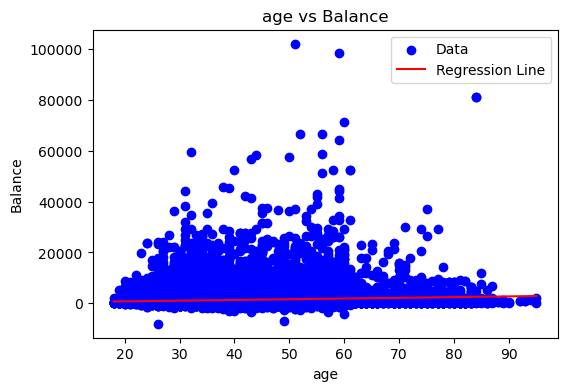

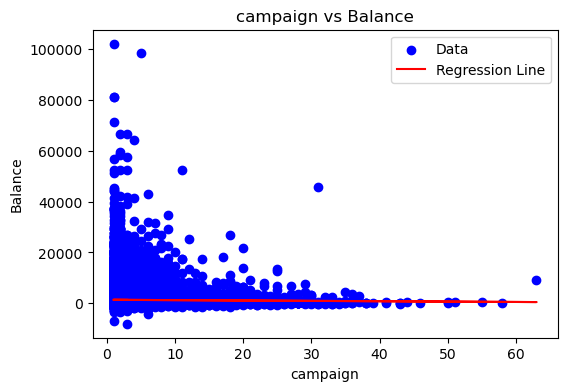

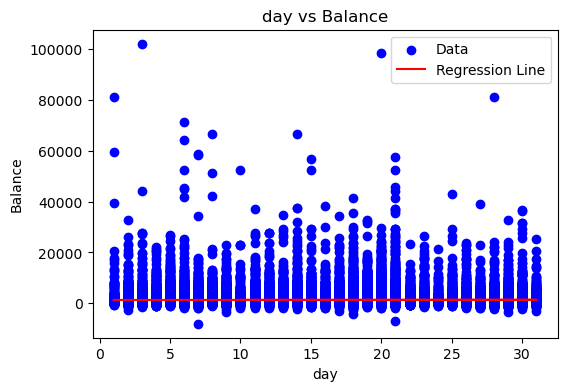

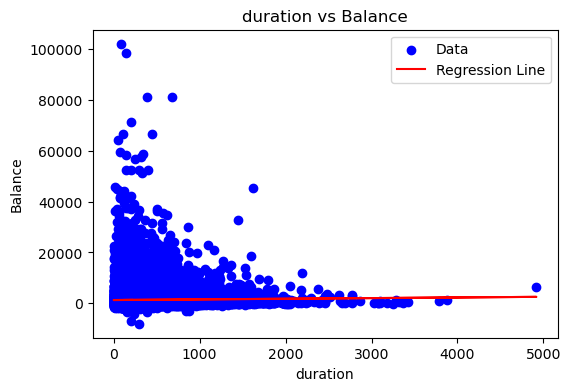

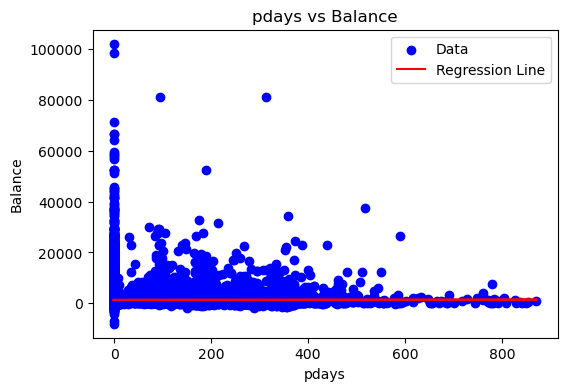

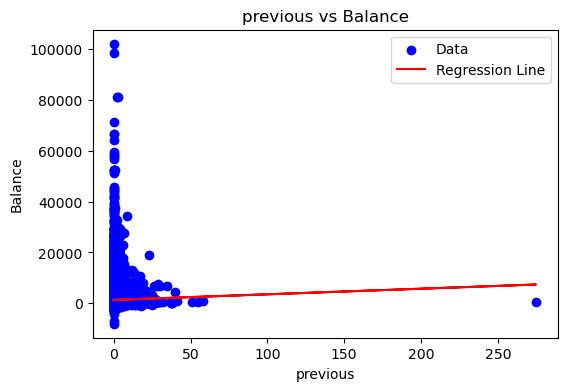

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your CSV dataset
csv_data = pd.read_csv('bank-full_worked.csv')

# Ensure the 'balance' column is numeric and drop NaN values if necessary
csv_data['balance'] = pd.to_numeric(csv_data['balance'], errors='coerce')
csv_data = csv_data.dropna(subset=['balance'])

# Exclude non-numeric columns from feature names
feature_names = csv_data.select_dtypes(include=[float, int]).columns.difference(['balance'])

# Loop through each numeric feature in csv_data
for feature in feature_names:
    # Extract the feature column and target variable (balance)
    X_feature = csv_data[[feature]].values  # Extract as a 2D array
    y = csv_data['balance'].values  # Target variable (balance)
    
    # Create a scatter plot for the feature against the target (balance)
    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, y, label='Data', color='blue')

    # Fit a linear regression model
    lm = LinearRegression()
    lm.fit(X_feature, y)

    # Plot the regression line
    plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Balance')
    plt.title(f'{feature} vs Balance')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


#### **Model fit **  
Now, let’s fit a multivariable linear regression model using the general syntax `lm()`. As above, use **mpg** as the response variable **Y**, and all other variables as the predictors.

**Step 1: Split the dataset into train and test sets, using a 75-25 split. (use random_state=42)**

**Step 2: Fit the linear regression model.**

In [9]:
# Your code here ...
lm = LinearRegression()
numeric_predictors = X_train.select_dtypes(include=[float, int])
lm.fit(numeric_predictors, y_train)

# Create a DataFrame containing the slope (coefficients) and intercept
coefficients_df = pd.DataFrame({
    "predictor": numeric_predictors.columns,
    "slope": lm.coef_,
    "intercept": [lm.intercept_] * len(lm.coef_)
})

# Display the coefficients DataFrame
print(coefficients_df)

# lm.coef_ gives the coefficients for each predictor (change in miles per gallon per unit change in each predictor variable)
# lm.intercept_ gives the intercept b_0 (the predicted miles per gallon when all predictors are set to 0)

      predictor     slope  intercept
0     cylinders -0.160143 -15.047371
1  displacement  0.000373 -15.047371
2    horsepower -0.001899 -15.047371
3        weight -0.006457 -15.047371
4  acceleration  0.057588 -15.047371
5    model_year  0.762270 -15.047371


#### **RMSPE** 
**Step 3. Finally, we predict on the test data set to assess how well our model does.** 

We will evaluate our final model's test error measured by RMSPE.

In [10]:
#Make predictions
X_test_numeric = X_test.select_dtypes(include=[float, int])  
y_pred = lm.predict(X_test_numeric) 

# Calculate RMSPE
RMSPE = mean_squared_error(
    y_true=y_test,  
    y_pred=y_pred  
)**(1/2)

print(RMSPE)


3.1854749513391596
